<a href="https://colab.research.google.com/github/kig2929kig/colab/blob/main/wordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install bs4


In [ ]:
from bs4 import BeautifulSoup
import requests

search_word = "박수홍" 
title_list = []
count = 1
def naver_news_get(start_num, end_num) :
  while start_num <= end_num :
    url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.format(search_word,start_num)
    req = requests.get(url)
    #print(req)
    start_num += 1
    if req.ok :
      html = req.text
      soup = BeautifulSoup(html, "html.parser")
      #print(soup)
      titles = soup.select('.news_tit')
      for title in titles :
        title_list.append(title['title'])
  return title_list

for tit in naver_news_get(1,10) :
  print(count, tit)
  count += 1

1 "아내, 죄인처럼 못 드러내"…박수홍, 23세 연하 부인 얘기에 눈물
2 “박수홍 형, 아버지에게 박수홍 통장에서 돈 빼오라 시켰다”
3 검찰, '박수홍 명예훼손' 유튜버 김용호 기소
4 박수홍 형·이은해 사건의 공통점…친족 범죄 얼마나 많나 [신현보의 딥데이터]
5 박수홍 친형 부부, 박수홍 돈으로 변호사 선임…총 61억여원 횡령(종합)
6 [TEN피플] '24살 연하♥' 최성국→'23살 연하♥' 박수홍, 반백살 넘어 '국민 노총각' 탈출
7 박수홍 "결혼식 아직 못해…아내 위해 해준 게 없다"
8 '편스토랑' 박수홍, 붐에 축의금... "결혼식 못 가 미안"
9 박수홍 상대 허위폭로 일삼던 유튜버, 명예훼손 등 혐의로 기소[전문]
10 박수홍 “편스토랑, 아내 추천으로 나와” 눈물
11 박수홍 친형 부부, 변호사비도 동생 계좌서 사용
12 검찰, '박수홍 명예훼손' 유튜버 김용호 기소
13 박수홍 형·이은해 사건의 공통점…친족 범죄 얼마나 많나 [신현보의 딥데이터]
14 박수홍 친형 부부, 박수홍 돈으로 변호사 선임…총 61억여원 횡령(종합)
15 [TEN피플] '24살 연하♥' 최성국→'23살 연하♥' 박수홍, 반백살 넘어 '국민 노총각' 탈출
16 박수홍 "결혼식 아직 못해…아내 위해 해준 게 없다"
17 '새신랑' 박수홍·붐→'열애중' 김나영…사랑꽃 피는 '편스토랑'
18 박수홍 상대 허위폭로 일삼던 유튜버, 명예훼손 등 혐의로 기소[전문]
19 박수홍 "23세 연하 아내에게 면사포 씌워주고 싶다"(종합)
20 박수홍 "많은 분 응원 덕에 살아"…원조 '요섹남' 컴백
21 검찰, '박수홍 명예훼손' 유튜버 김용호 기소
22 박수홍 형·이은해 사건의 공통점…친족 범죄 얼마나 많나 [신현보의 딥데이터]
23 박수홍 친형 부부, 박수홍 돈으로 변호사 선임…총 61억여원 횡령(종합)
24 [TEN피플] '24살 연하♥' 최성국→'23살 연하♥' 박수홍, 반백살 넘어 '국민 노총각' 탈출
25 박수홍 "결혼식 아직 못해…아내 위해 해준 게 없다"
26 '새

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 68.8 MB/s 


In [ ]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

def classification() :
  temp = []
  noun_list = []
  kkma = Kkma()
  titles = naver_news_get(1,10)
  for title in titles :
    morph = kkma.pos(title)
    temp.append(morph)
  
  #print(temp)
  
  for sentence in temp :
    for word, tag in sentence :
      if tag in ['NNG'] :
         noun_list.append(word)
  #print(noun_adj_list)
  return noun_list
print(classification())

['대한민국', '최고', '농업', '기술', '명인', '탄생', '대한민국', '디지털', '전략', '주간', '개최', '국립', '중앙', '서관', '대한민국', '국가', '서지', '공개', '식', '약', '처', '대한민국', '약전', '국산', '감초', '등재', '문화', '관광', '대한민국', '안전', '대상', '행', '안부', '장관', '수상', '안전', '대한민국', '안', '호', '덕', '암중모색', '처', '대한민국', '안전', '대상', '행정', '안전', '부장', '관상', '수상', '영상', '속', '얼굴', '대한', '민국', '트라', '우마', '공포', '박람회', '대한민국', '축구', '종합', '센터', '건립', '추진', '대한민국', '유', '튜브', '정', '파적', '뉴스', '시장', '고도화', '대한민국', '디지털', '전략', '주간', '개최', '안전', '대한민국', '안', '호', '덕', '암중모색', '국립', '중앙', '서관', '대한민국', '국가', '서지', '공개', '식', '약', '처', '대한민국', '약전', '국산', '감초', '등재', '영상', '속', '얼굴', '대한', '민국', '트라', '우마', '공포', '박람회', '대한민국', '축구', '종합', '센터', '건립', '추진', '대한민국', '유', '튜브', '정', '파적', '뉴스', '시장', '고도화', '대한민국', '충격', '이제', '중요', '건', '처', '대한민국', '안전', '대상', '행정', '안전', '부장', '관상', '수상', '대구', '행복', '진흥원', '대한민국', '복지', '패러다임', '선도', '안전', '대한민국', '안', '호', '덕', '암중모색', '국립', '중앙', '서관', '대한민국', '국가', '서지', '공개', '식', '약', '처', '대한민국', '약전', '국산'

In [ ]:
from collections import Counter

def word_count() :
  temp_list = classification()
  counts = Counter(temp_list)
  tags = counts.most_common(15) # 15개 명사만
  
  return tags

print(word_count())




[('대한민국', 282), ('안전', 96), ('대상', 57), ('수상', 57), ('처', 45), ('행정', 30), ('부장', 30), ('관상', 30), ('문화', 27), ('관광', 27), ('행', 27), ('안부', 27), ('장관', 27), ('대구', 27), ('행복', 27)]


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (21.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [ ]:
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


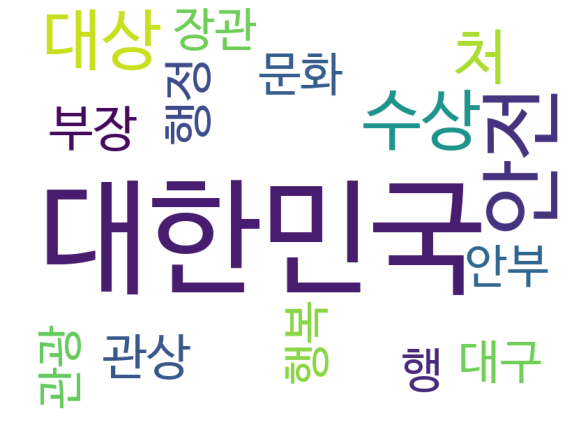

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white', width=800, height=600)
#print(dict(word_count()))

plt.rc('font', family='NanumBarunGothic')
cloud = wc.generate_from_frequencies(dict(word_count()))
#print(cloud)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

[참고 - 워드클라우드] (https://lovit.github.io/nlp/2018/04/17/word_cloud/)